In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import CP_ALS3 as cp

In [7]:
%%time
init_shape = (10, 10, 10)
coo, vals = cp.gen_coo_tensor(init_shape, density=0.02)
assert cp.check_coo_tensor(coo)!= "Bad"

a, b, c, _ = cp.cp_als3(coo, vals, init_shape, rank=30, max_iter=10)
rerr = cp.sqrt_err_relative(coo, vals, init_shape, a, b, c)
print(rerr)

iterations over
0.031122231031799334
CPU times: user 12.9 ms, sys: 0 ns, total: 12.9 ms
Wall time: 12.6 ms


In [8]:
inds_list = pickle.load(open('../wikidata_tensors/fb_list.pcl', 'rb'))
ind_to_entity = pickle.load(open('../wikidata_tensors/fb_idx2ent.pcl', 'rb'))
ind_to_rel = pickle.load(open('../wikidata_tensors/fb_idx2rel.pcl', 'rb'))

In [9]:
values = [1] * len(inds_list)
values = np.array(values, dtype=np.float64)

coords = np.array(inds_list, dtype=np.int32)
nnz = len(inds_list)
data_shape = (14242, 1182, 14242)

In [11]:
max_iter = 35
rank = 40

In [13]:
%%time
a, b, c, err_arr = cp.cp_als3(
    coords,
    values,
    shape=data_shape,
    rank=rank,
    max_iter=max_iter,
)

iterations over
CPU times: user 52.6 s, sys: 1.86 s, total: 54.5 s
Wall time: 27.3 s


In [14]:
rerr = cp.sqrt_err_relative(
    coords,
    values,
    data_shape,
    a,
    b,
    c,
)

print(f"Relative error = {rerr}")

Relative error = 631.5292729898073


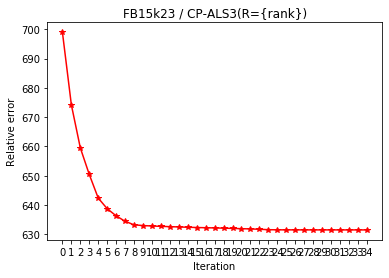

In [15]:
plt.xlabel("Iteration")
plt.ylabel("Relative error")
plt.title("FB15k23 / CP-ALS3(R={rank})")
plt.xticks(np.arange(max_iter))
plt.plot(np.arange(max_iter), err_arr[:max_iter], 'r-*')

## A couple of results:

In [ ]:
rank=3000, max_iter=20, rerr=294 1h 17min

In [ ]:
rank=2000, max_iter=10, rerr=342 25min

In [ ]:
rank=1000, max_iter=200, rerr=383 1h 50min

In [ ]:
rank=1000, max_iter=20, rerr=387

In [ ]:
rank=400, max_iter=20, rerr=460 2min